In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from EvEye.utils.processor.TxtProcessor import TxtProcessor
from pathlib import Path

In [23]:
txt_path = Path(
    "/mnt/data2T/junyuan/eye-tracking/datasets/DavisEyeCenterDataset/train/data/user1_left_session_1_0_1_events.txt"
)
events = TxtProcessor(txt_path).load_events_from_txt()
print(f"Total events: {len(events)}")

Total events: 12086743


In [24]:
def get_counts_times_ms(events, fixed_count, groups_num):
    counts_timess_ms = []
    for index in range(groups_num):
        start_index = index * fixed_count
        end_index = (index + 1) * fixed_count
        group = events[start_index:end_index]
        time_us = int(group['t'][-1] - group['t'][0])
        time_ms = time_us / 1000
        counts_timess_ms.append(time_ms)
    return counts_timess_ms

In [25]:
evts5000 = get_counts_times_ms(events, 5000, 800)
evts10000 = get_counts_times_ms(events, 10000, 800)
evts15000 = get_counts_times_ms(events, 15000, 800)

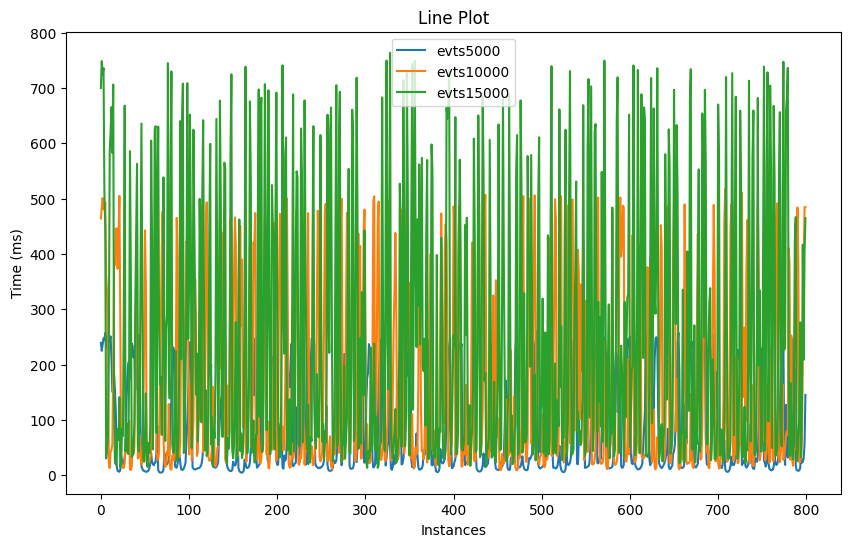

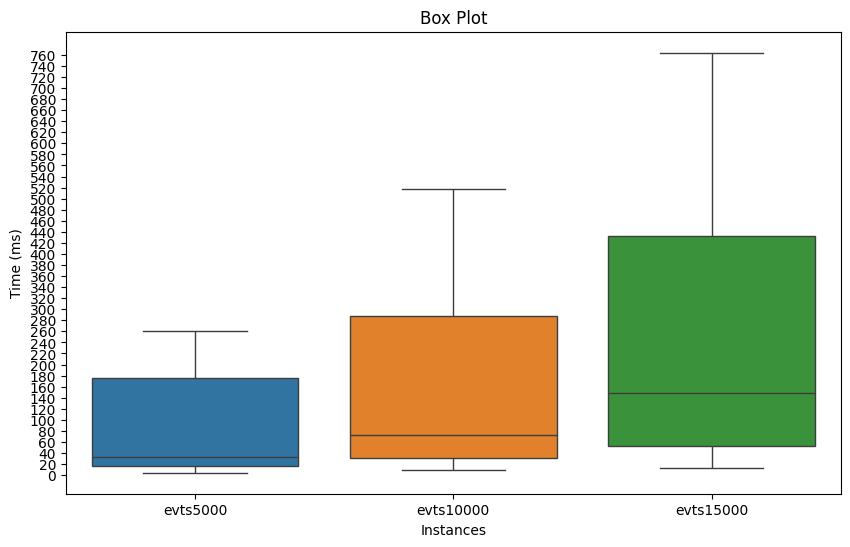

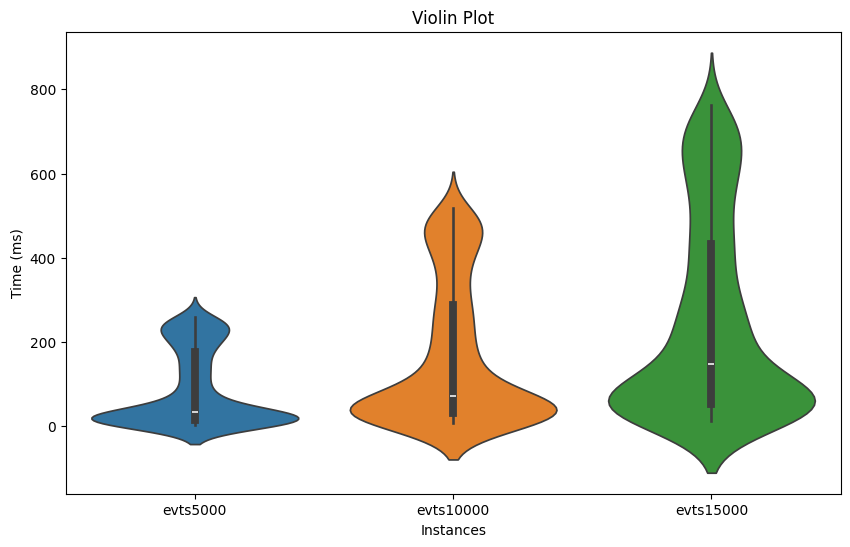

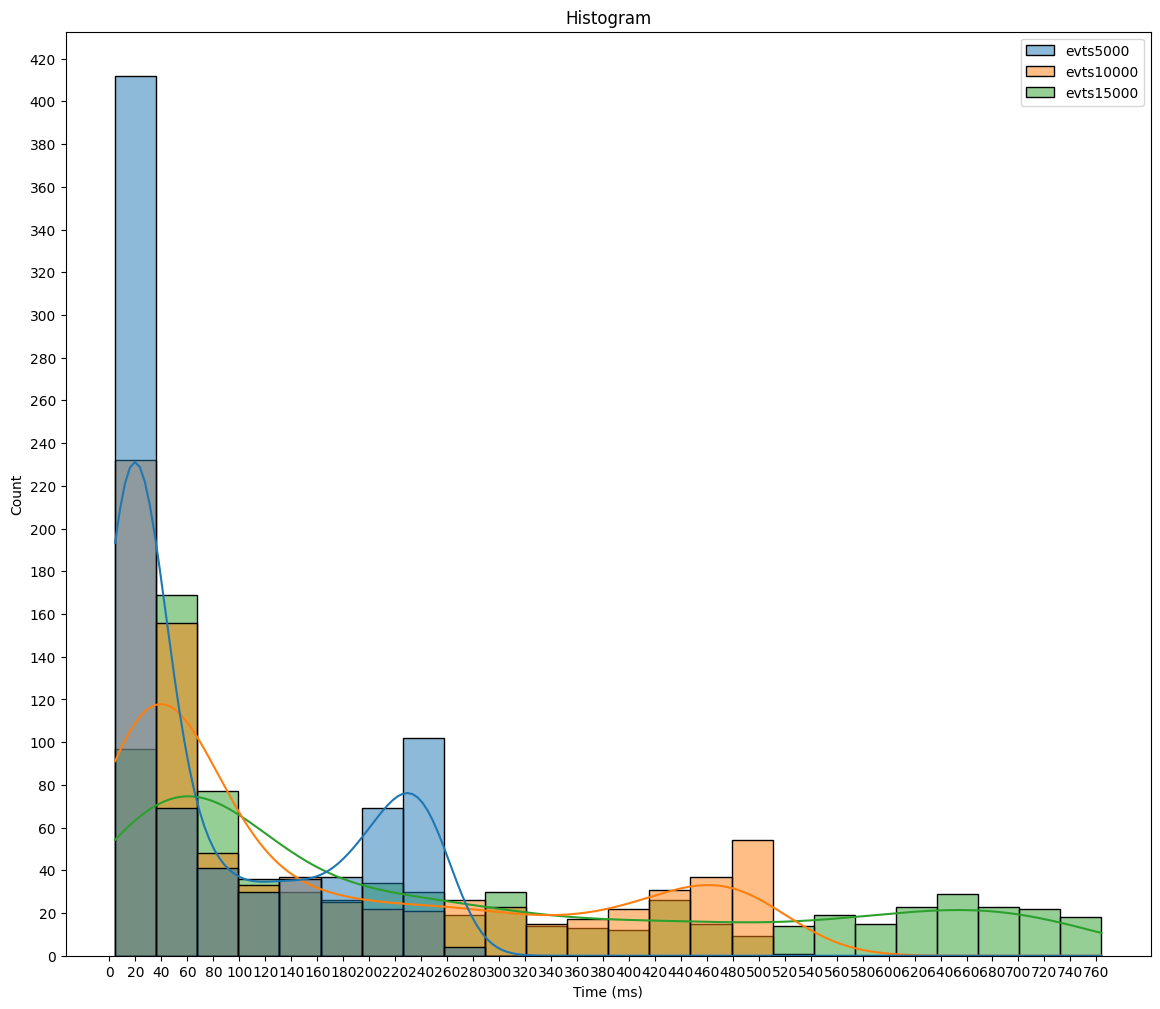

In [30]:
"""Draw the figures"""

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {'evts5000': evts5000, 'evts10000': evts10000, 'evts15000': evts15000}
df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, dashes=False)
plt.title('Line Plot')
plt.xlabel('Instances')
plt.ylabel('Time (ms)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Box Plot')
plt.xlabel('Instances')
plt.ylabel('Time (ms)')
plt.yticks(np.arange(0, df.max().max(), 20))
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(data=df)
plt.title('Violin Plot')
plt.xlabel('Instances')
plt.ylabel('Time (ms)')
plt.show()

plt.figure(figsize=(14, 12))
sns.histplot(data=df, kde=True)
plt.title('Histogram')
plt.xlabel('Time (ms)')
plt.xticks(np.arange(0, df.max().max(), 20))
plt.yticks(np.arange(0, 430, 20))
plt.show()